## **Our Approach**

 > #### mainly focus on the `Production/Area`, `Crop-Type` and `DistrictName` of Haryana only

 > #### reasoning is bcuz we need to `link with another file` which is bout avg of each soil-nutreint in eaach DistrictName of Haryana State only

 - gonna make a `dashboard` to visualize the `each Crop-Type in dirrent DistrictName` according to P/A
 - gonna make a `dashboard` to visualize the `each DistrictName of dirrent Crop-Type` according to P/A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/3rdVersion/apy.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


## **Focus on in `State Haryana`**

In [3]:
df[df['State_Name']=='Haryana'].nunique()

State_Name          1
District_Name      21
Crop_Year          16
Season              3
Crop               42
Area             2809
Production        850
dtype: int64

In [4]:
df_haryana = df[df['State_Name']=='Haryana']
print('#rows in Haryana',len(df_haryana))
df_haryana.head(2)

#rows in Haryana 5875


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
65596,Haryana,AMBALA,1997,Kharif,Bajra,1000.0,1000.0
65597,Haryana,AMBALA,1997,Kharif,Maize,8000.0,15000.0


## **MissingValue & ZeroValue**

In [6]:
df_haryana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5875 entries, 65596 to 71470
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     5875 non-null   object 
 1   District_Name  5875 non-null   object 
 2   Crop_Year      5875 non-null   int64  
 3   Season         5875 non-null   object 
 4   Crop           5875 non-null   object 
 5   Area           5875 non-null   float64
 6   Production     4540 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 367.2+ KB


In [5]:
df_haryana.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       1335
dtype: int64

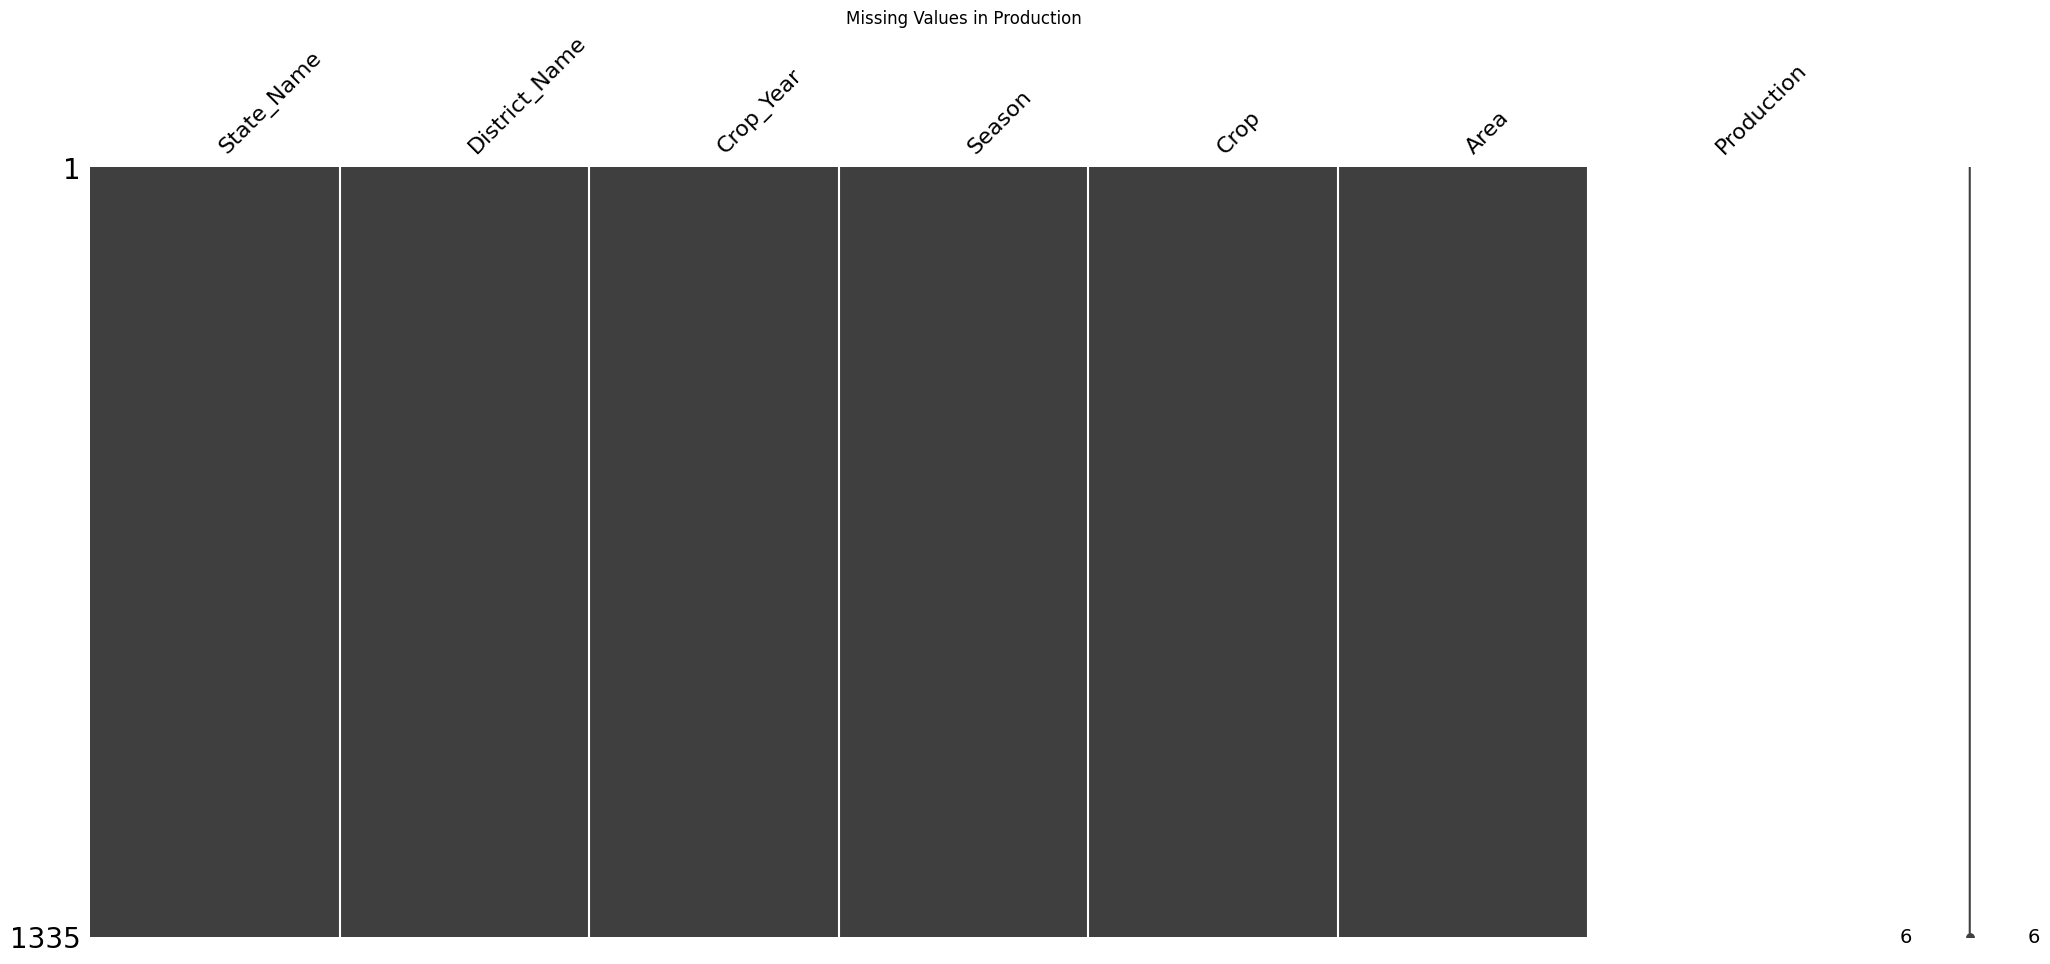

In [8]:
import missingno as msno
msno.matrix(df_haryana[df_haryana['Production'].isna()])
plt.title('Missing Values in Production')
plt.show()

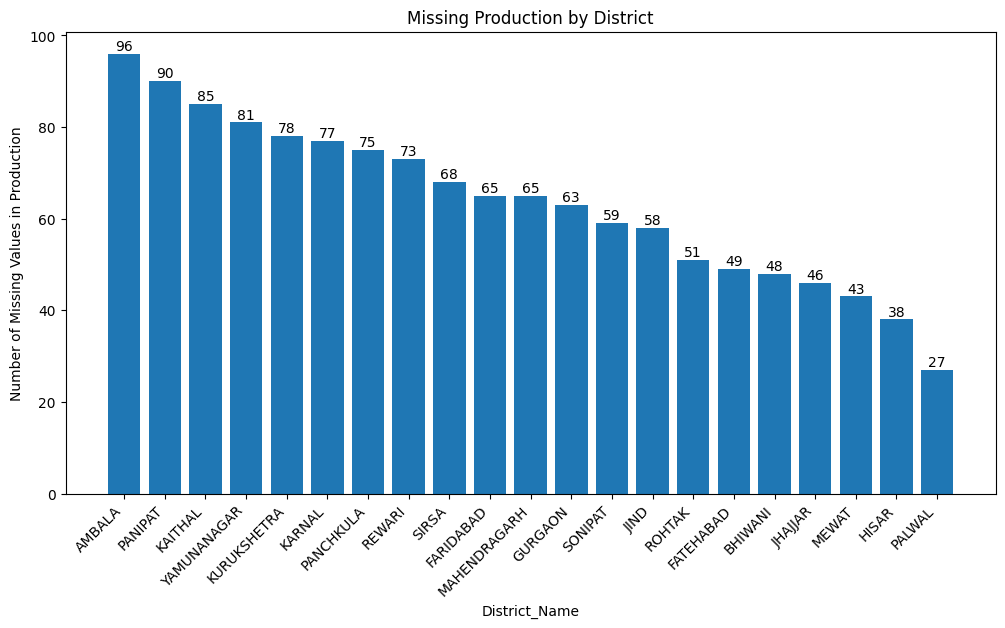

In [15]:
# Find the missing values
missing_df = df_haryana['Production'].isnull()

# Create a mask for unique districts
unique_districts = pd.unique(df_haryana['District_Name'])

# Count the missing values for each district
missing_counts = {}
for district in unique_districts:
    mask = (df_haryana['District_Name'] == district) & missing_df
    missing_counts[district] = mask.sum()

# Sort the districts by the number of missing values
sorted_districts = sorted(unique_districts, key=lambda x: missing_counts[x], reverse=True)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_districts, [missing_counts[district] for district in sorted_districts])

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('District_Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Missing Values in Production')
plt.title('Missing Production by District')
plt.show()

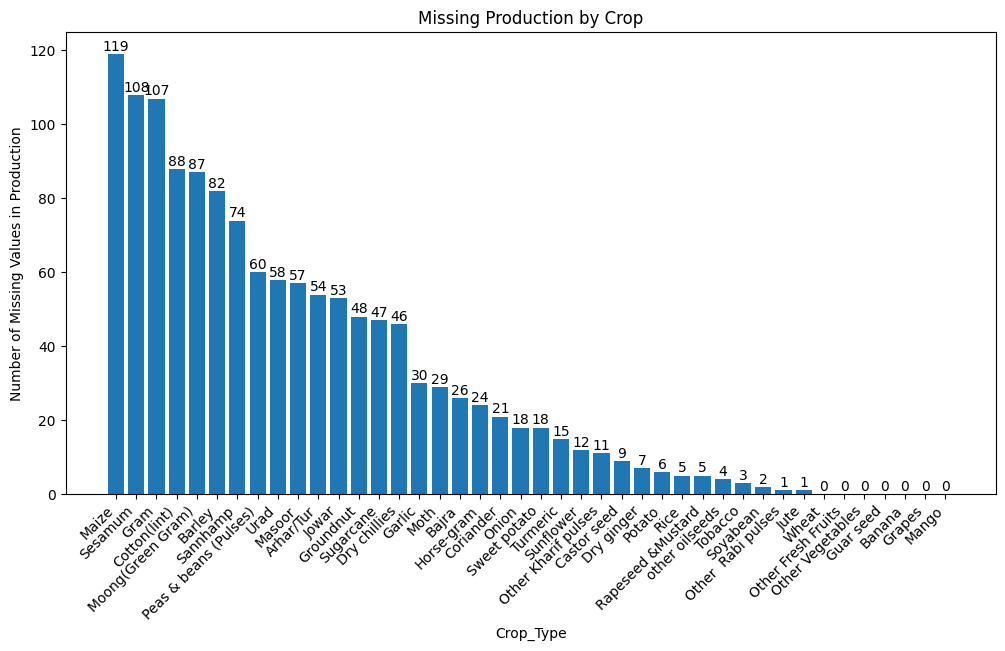

In [17]:
# Find the missing values
missing_df = df_haryana['Production'].isnull()

# Create a mask for unique districts
unique_districts = pd.unique(df_haryana['Crop'])

# Count the missing values for each district
missing_counts = {}
for district in unique_districts:
    mask = (df_haryana['Crop'] == district) & missing_df
    missing_counts[district] = mask.sum()

# Sort the districts by the number of missing values
sorted_districts = sorted(unique_districts, key=lambda x: missing_counts[x], reverse=True)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_districts, [missing_counts[district] for district in sorted_districts])

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Crop_Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Missing Values in Production')
plt.title('Missing Production by Crop')
plt.show()

In [18]:
df_haryana = df_haryana.dropna()
len(df_haryana)

4540

In [19]:
ZeroValue = df_haryana[df_haryana['Production'] == 0.0]
ZeroValue

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
65625,Haryana,AMBALA,1999,Kharif,Bajra,371.0,0.0
65626,Haryana,AMBALA,1999,Kharif,Cotton(lint),25.0,0.0
65627,Haryana,AMBALA,1999,Kharif,Groundnut,6.0,0.0
65628,Haryana,AMBALA,1999,Kharif,Jowar,1.0,0.0
65631,Haryana,AMBALA,1999,Kharif,Sesamum,7.0,0.0
...,...,...,...,...,...,...,...
71264,Haryana,YAMUNANAGAR,2003,Kharif,Sesamum,5.0,0.0
71266,Haryana,YAMUNANAGAR,2003,Rabi,Barley,29.0,0.0
71267,Haryana,YAMUNANAGAR,2003,Rabi,Gram,244.0,0.0
71269,Haryana,YAMUNANAGAR,2003,Rabi,Peas & beans (Pulses),29.0,0.0


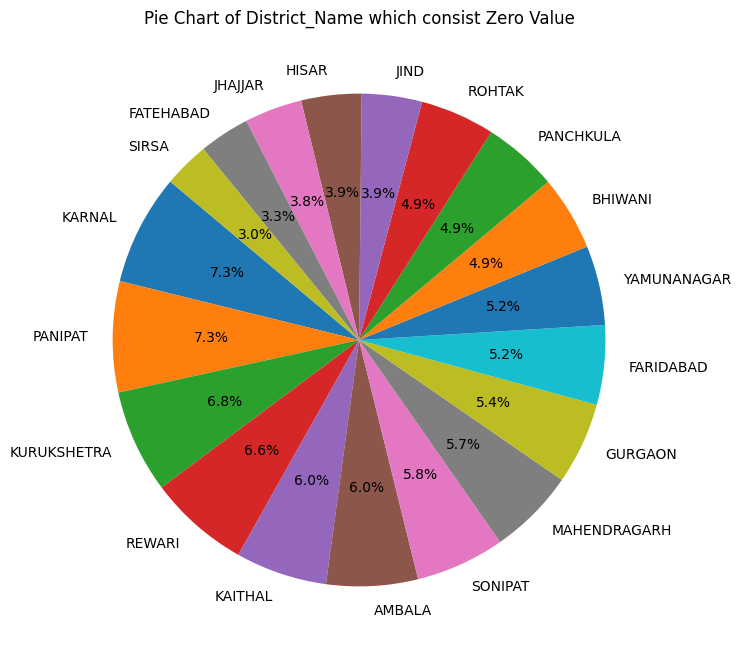

In [21]:
# Replace 'YourColumnName' with the actual column name containing string values
column_name = 'District_Name'

# Count the occurrences of each unique value in the specified column
value_counts = ZeroValue[column_name].value_counts()

# Calculate the percentage for each value
percentages = (value_counts / value_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_name} which consist Zero Value')
plt.show()

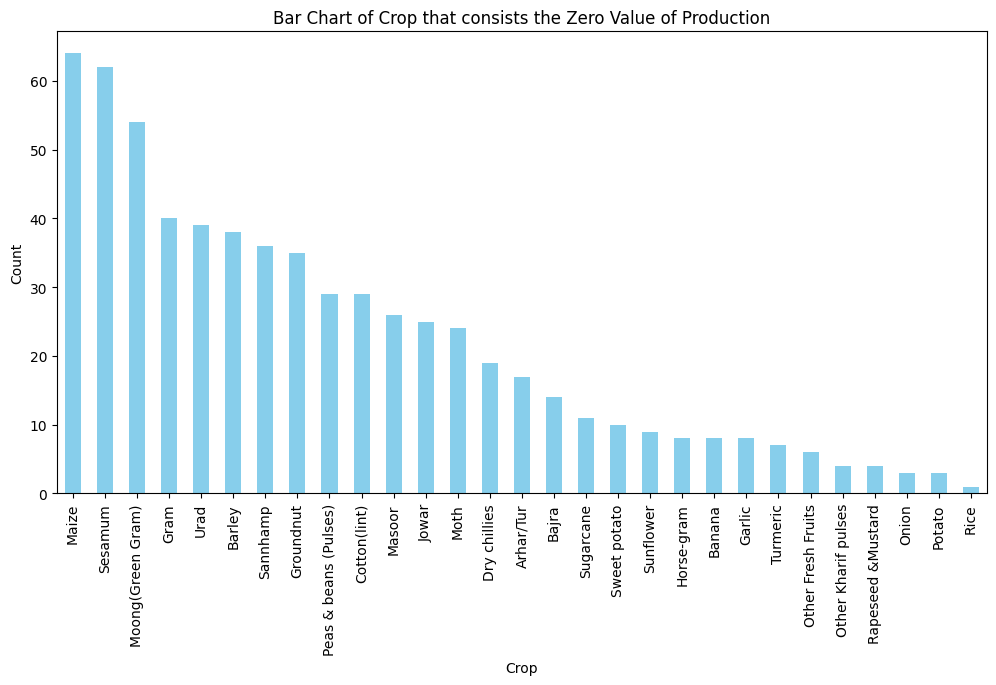

In [25]:
# Replace 'YourColumnName' with the actual column name containing string values
column_name = 'Crop'

# Count the occurrences of each unique value in the specified column
value_counts = ZeroValue[column_name].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Bar Chart of {column_name} that consists the Zero Value of Production')
plt.show()

In [26]:
df_haryana = df_haryana[df_haryana['Production'] != 0.0]
len(df_haryana)

3907

> ### there is no Zero & Missing Values in Production of Haryana State now.

> ### we get `3907` rows to forecast more

In [27]:
df_haryana['P/A'] = df_haryana['Production']/df_haryana['Area']
df_haryana.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
65596,Haryana,AMBALA,1997,Kharif,Bajra,1000.0,1000.0,1.000
65597,Haryana,AMBALA,1997,Kharif,Maize,8000.0,15000.0,1.875


In [29]:
print(df_haryana['Crop'].nunique())
print(df_haryana['Crop'].value_counts())

37
Crop
Wheat                    317
Rice                     299
Bajra                    276
Rapeseed &Mustard        268
Sugarcane                248
Arhar/Tur                213
Potato                   213
Onion                    191
Barley                   187
Cotton(lint)             175
Gram                     158
Dry chillies             142
Masoor                   133
Jowar                    122
Sesamum                  112
Moong(Green Gram)        105
Peas & beans (Pulses)     93
Groundnut                 91
Maize                     84
Urad                      72
Sunflower                 63
Garlic                    49
Sweet potato              43
Moth                      42
Other Vegetables          38
Other Fresh Fruits        26
Castor seed               25
Other Kharif pulses       23
Horse-gram                18
Sannhamp                  17
Guar seed                 16
Other  Rabi pulses        13
Turmeric                  11
Coriander                 10
Mango 

In [28]:
print(df_haryana['District_Name'].nunique())
print(df_haryana['District_Name'].value_counts())

21
District_Name
HISAR           250
FATEHABAD       232
BHIWANI         227
SIRSA           225
PANCHKULA       219
YAMUNANAGAR     212
SONIPAT         211
KARNAL          211
JHAJJAR         200
ROHTAK          196
GURGAON         188
AMBALA          186
KAITHAL         182
JIND            182
PANIPAT         180
FARIDABAD       179
REWARI          170
KURUKSHETRA     169
MAHENDRAGARH    145
MEWAT            92
PALWAL           51
Name: count, dtype: int64


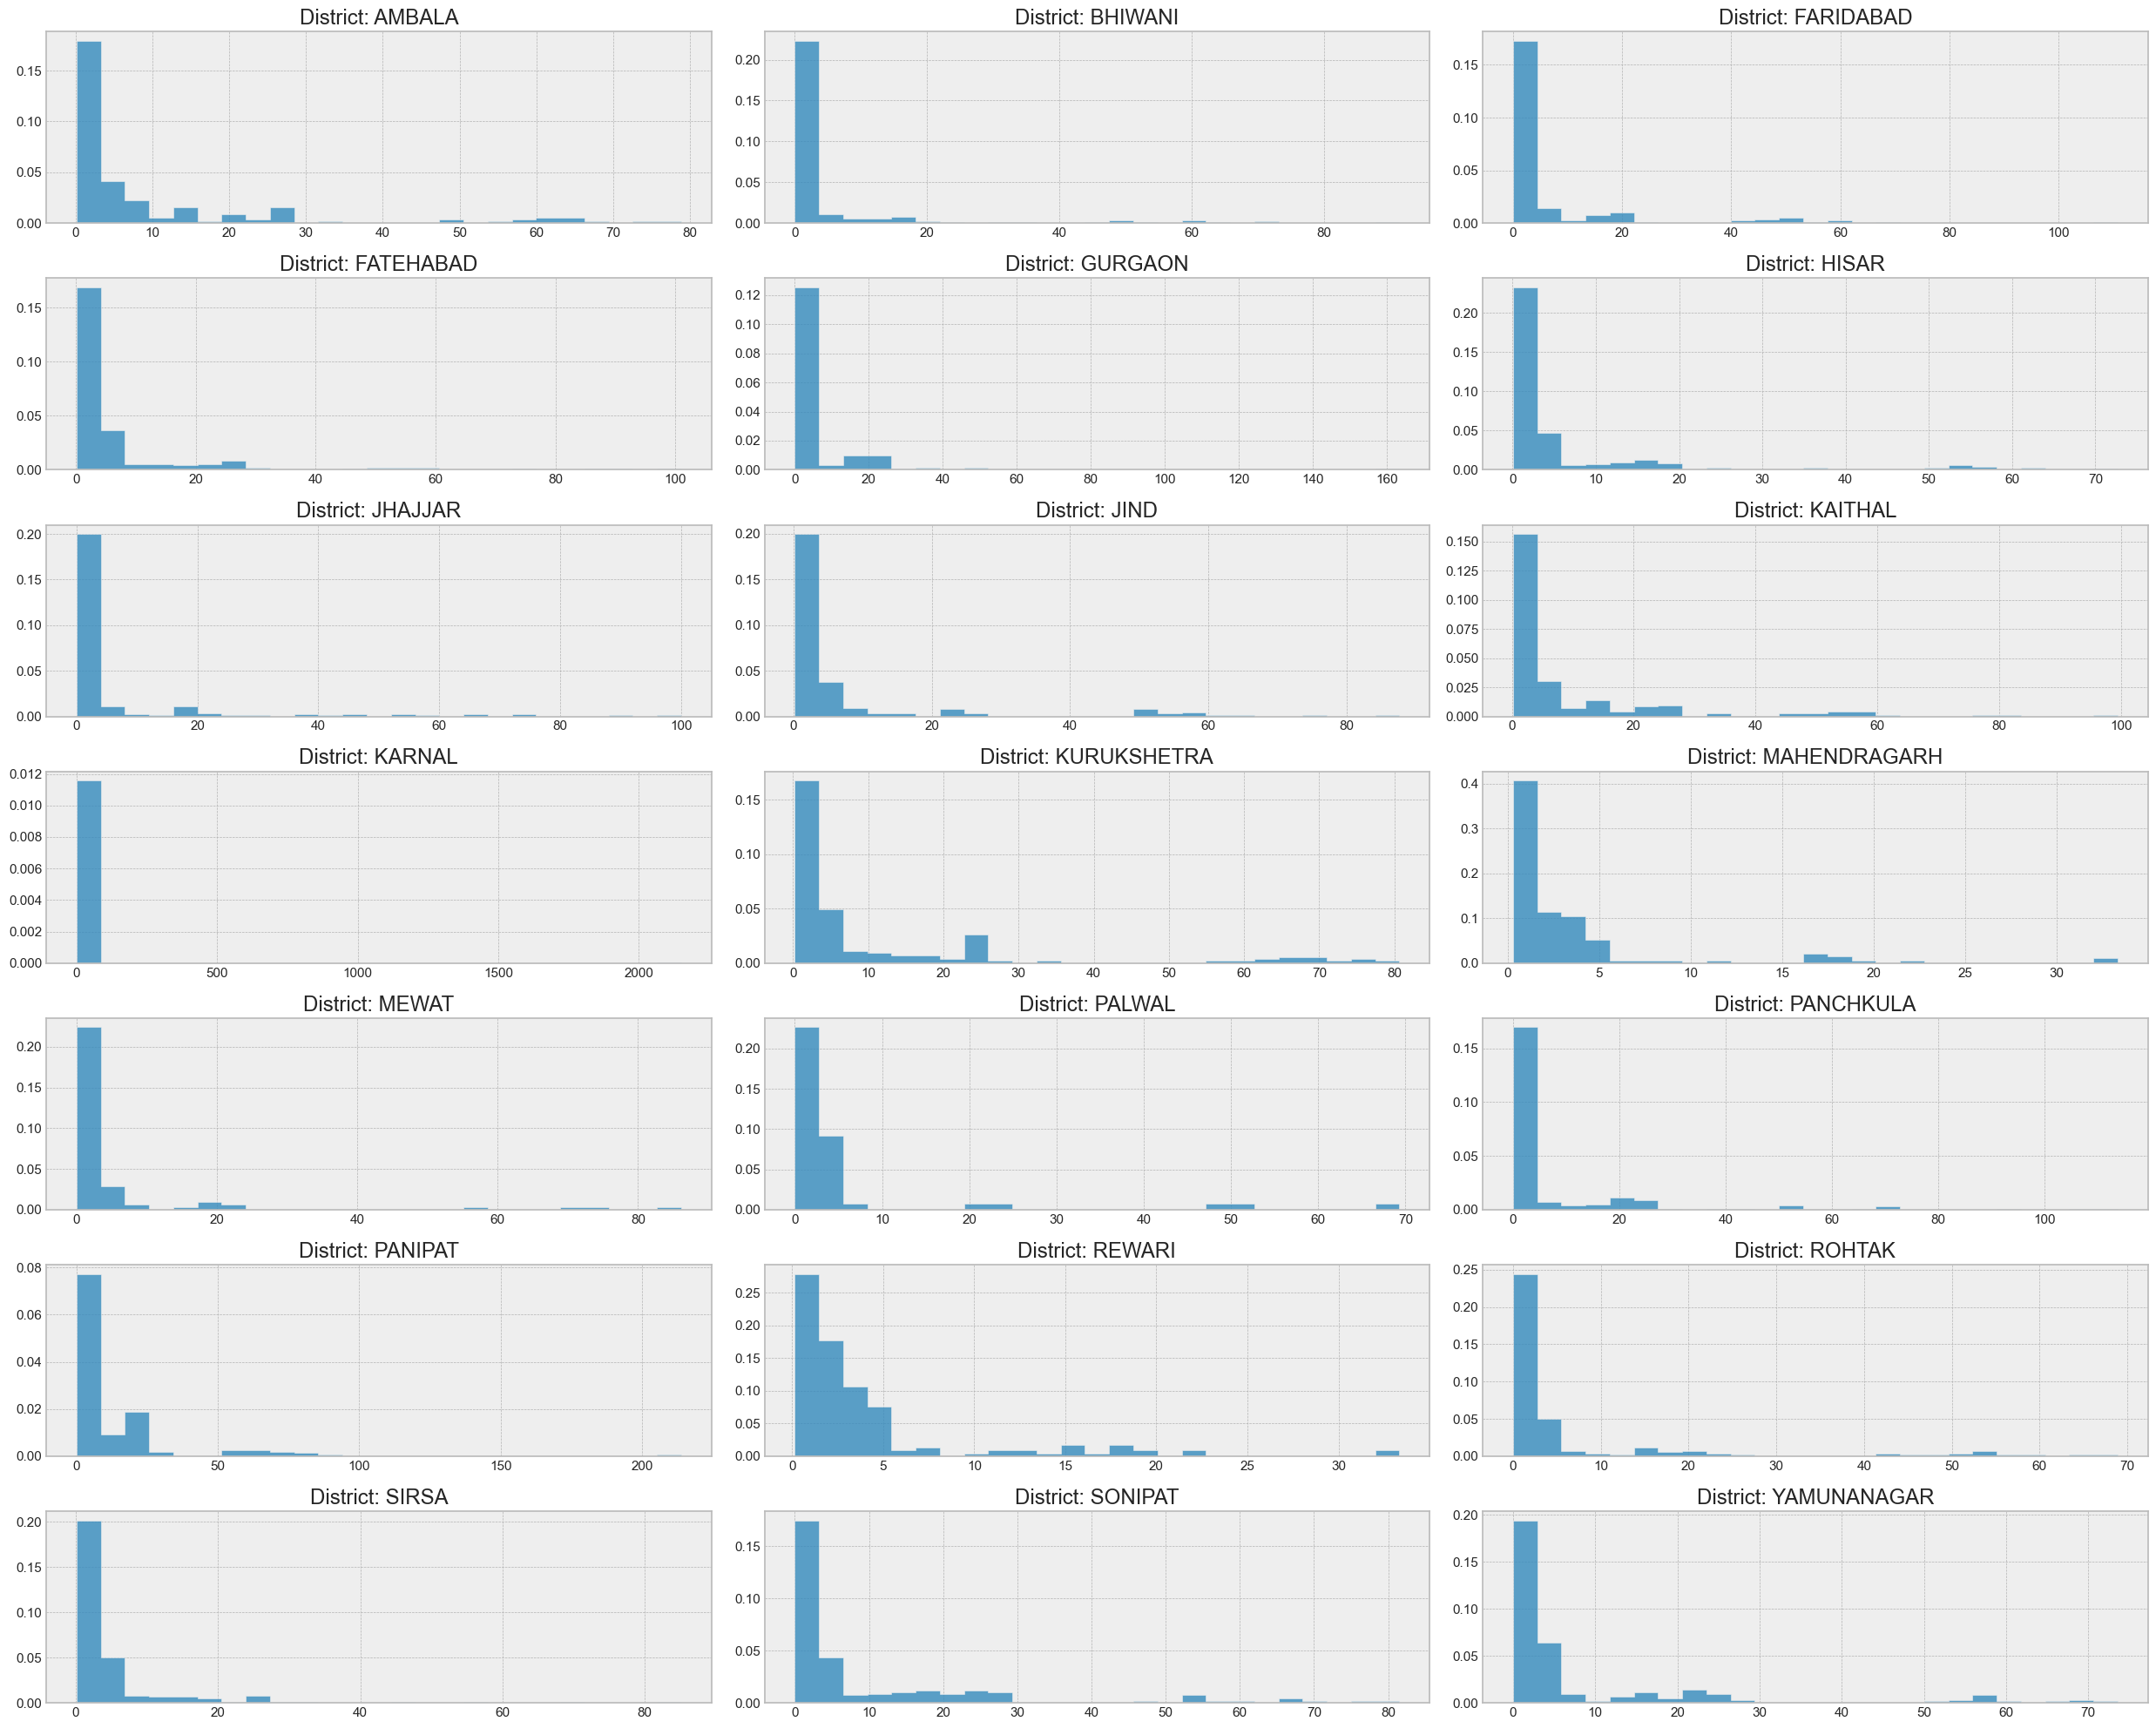

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

plt.style.use('bmh')


def plot_beta_hist(ax, data):
    ax.hist(data['P/A'], histtype="stepfilled", bins=25, alpha=0.8, density=True)
    ax.set_title(f"District: {data['District_Name'].iloc[0]}")


# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(25, 20))

# Iterate through unique District_Name values
unique_districts = df_haryana['District_Name'].unique()

for i, district in enumerate(unique_districts):
    # Select data for the current district
    district_data = df_haryana[df_haryana['District_Name'] == district]
    
    # Plot the histogram for P/A
    plot_beta_hist(axes.flatten()[i], district_data)

plt.tight_layout()
plt.show()


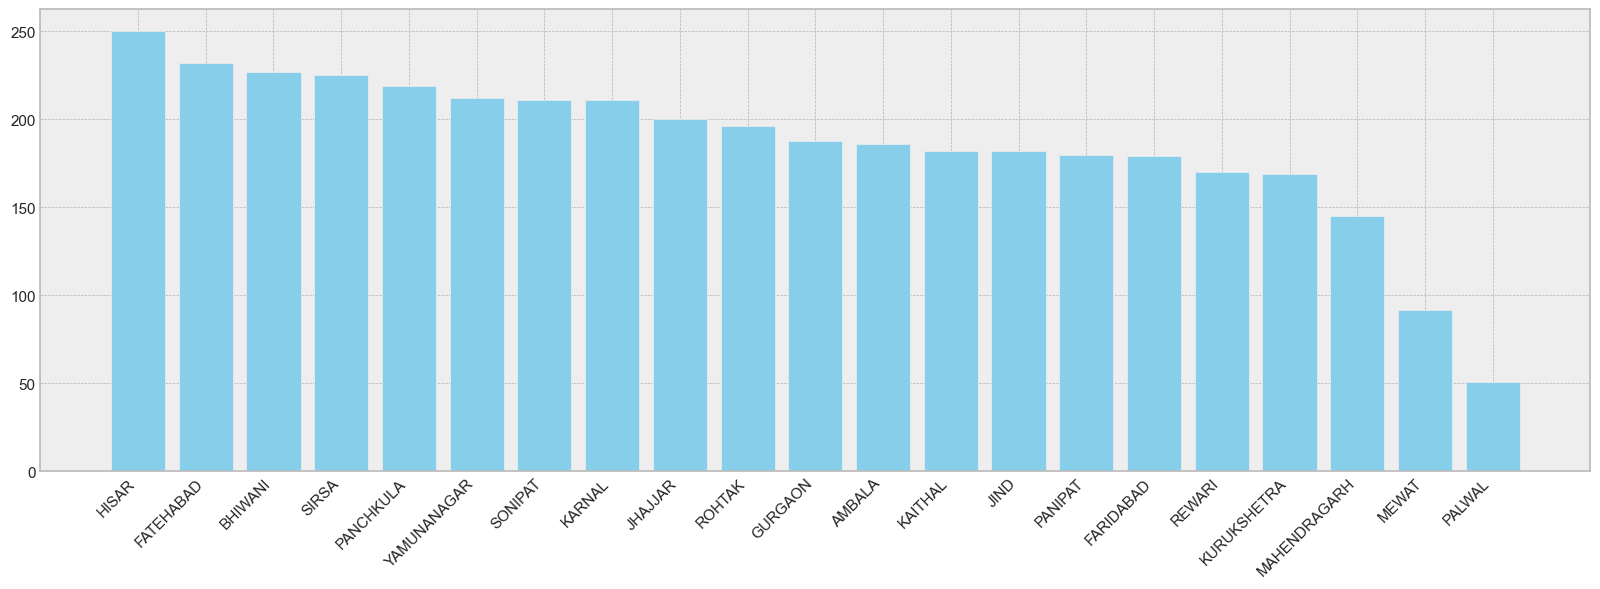

In [36]:
plt.figure(figsize=(20, 6))

# Assuming 'District_Name' is the column containing district names
district_counts = df_haryana['District_Name'].value_counts()
plt.bar(district_counts.index, district_counts, color='skyblue')

plt.xticks(rotation=45, ha='right')
plt.show()

> ### the num in dataset of each DistrictName is not the Uniformly distributed - it can be a problem with the last 2 DistrictNames which are` MEWAT` & `PALWAL`.

## **Check on Mewat & Palwal**

In [13]:
mewat = df_haryana[df_haryana['District_Name'] == 'MEWAT']
print(len(mewat))
mewat.head(2)

92


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
69109,Haryana,MEWAT,2005,Kharif,Arhar/Tur,401.0,400.0,0.997506
69110,Haryana,MEWAT,2005,Kharif,Bajra,25413.0,26000.0,1.023098


In [14]:
mewat['P/A'].describe()

count    92.000000
mean      6.018640
std      15.054349
min       0.005111
25%       0.540547
50%       1.611980
75%       3.217449
max      86.124402
Name: P/A, dtype: float64

In [15]:
pawal = df_haryana[df_haryana['District_Name'] == 'PALWAL']
print(len(pawal))
pawal.head(2)

51


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
69244,Haryana,PALWAL,2008,Kharif,Arhar/Tur,1591.0,1600.0,1.005657
69245,Haryana,PALWAL,2008,Kharif,Bajra,7784.0,15000.0,1.927030


In [16]:
pawal['P/A'].describe()

count    51.000000
mean      6.195451
std      13.612767
min       0.005359
25%       1.000232
50%       2.107482
75%       4.226700
max      69.298730
Name: P/A, dtype: float64

> ### both consist the error btw mean/std/min/max

> ### the problem is bout the `outlier` of `P/A`

### `Dectect Outlier of P/A`

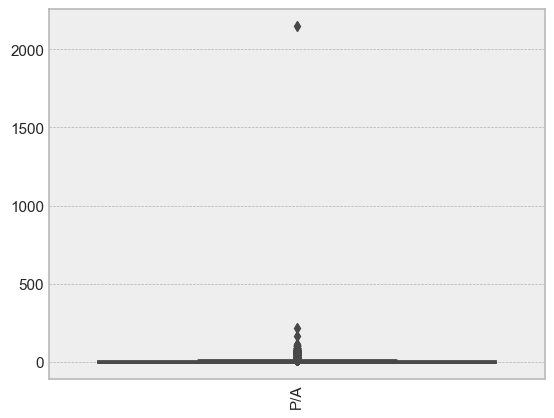

In [37]:
sns.boxplot(data=df_haryana[['P/A']])
plt.xticks(rotation=90)
plt.show()

In [38]:
df_haryana[df_haryana['P/A'] > 2000 ]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
68479,Haryana,KARNAL,2008,Whole Year,Onion,2.0,4300.0,2150.0


In [41]:
outlier = df_haryana[df_haryana['P/A'] > 10 ]
outlier

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
65602,Haryana,AMBALA,1997,Whole Year,Sugarcane,12000.0,580000.0,48.333333
65621,Haryana,AMBALA,1998,Whole Year,Onion,898.0,12100.0,13.474388
65622,Haryana,AMBALA,1998,Whole Year,Potato,2567.0,40200.0,15.660304
65623,Haryana,AMBALA,1998,Whole Year,Sugarcane,14296.0,700000.0,48.964745
65640,Haryana,AMBALA,1999,Whole Year,Onion,680.0,9800.0,14.411765
...,...,...,...,...,...,...,...,...
71446,Haryana,YAMUNANAGAR,2011,Whole Year,Onion,279.0,5000.0,17.921147
71447,Haryana,YAMUNANAGAR,2011,Whole Year,Potato,540.0,8100.0,15.000000
71467,Haryana,YAMUNANAGAR,2012,Whole Year,Onion,285.0,8000.0,28.070175
71468,Haryana,YAMUNANAGAR,2012,Whole Year,Potato,937.0,21000.0,22.411953


In [43]:
outlier['District_Name'].value_counts()

District_Name
PANIPAT         57
SONIPAT         55
KARNAL          46
KURUKSHETRA     45
KAITHAL         45
AMBALA          44
YAMUNANAGAR     44
PANCHKULA       42
HISAR           41
FATEHABAD       38
GURGAON         33
JHAJJAR         31
ROHTAK          31
FARIDABAD       31
BHIWANI         30
JIND            27
SIRSA           27
REWARI          21
MAHENDRAGARH    12
MEWAT           11
PALWAL           5
Name: count, dtype: int64

In [20]:
y2011 = outlier[outlier['Crop_Year']==2008]
y2011['Crop'].value_counts()

Crop
Sugarcane       16
Potato          12
Onion            9
Dry chillies     6
Sweet potato     3
Turmeric         1
Name: count, dtype: int64

In [40]:
df_haryana_no_outlier = df_haryana[df_haryana['P/A'] < 10]
print(len(df_haryana_no_outlier))
df_haryana_no_outlier.head(2)

3190


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
65596,Haryana,AMBALA,1997,Kharif,Bajra,1000.0,1000.0,1.000
65597,Haryana,AMBALA,1997,Kharif,Maize,8000.0,15000.0,1.875


In [22]:
df_haryana_no_outlier['Crop'].value_counts()

Crop
Wheat                    317
Rice                     299
Bajra                    276
Rapeseed &Mustard        268
Arhar/Tur                213
Barley                   187
Cotton(lint)             175
Gram                     158
Masoor                   133
Jowar                    122
Dry chillies             117
Sesamum                  112
Moong(Green Gram)        105
Peas & beans (Pulses)     93
Groundnut                 91
Maize                     84
Urad                      72
Sunflower                 62
Moth                      42
Garlic                    32
Sugarcane                 29
Other Vegetables          28
Castor seed               25
Other Kharif pulses       23
Other Fresh Fruits        21
Horse-gram                18
Sannhamp                  17
Guar seed                 16
Other  Rabi pulses        13
Turmeric                  10
Coriander                 10
Mango                      9
Onion                      6
Potato                     3
Grapes   

In [44]:
df_haryana_no_outlier['District_Name'].value_counts()

District_Name
HISAR           209
SIRSA           198
BHIWANI         196
FATEHABAD       194
PANCHKULA       177
JHAJJAR         169
YAMUNANAGAR     168
KARNAL          165
ROHTAK          165
SONIPAT         156
GURGAON         155
JIND            155
REWARI          149
FARIDABAD       148
AMBALA          142
KAITHAL         137
MAHENDRAGARH    133
KURUKSHETRA     124
PANIPAT         123
MEWAT            81
PALWAL           46
Name: count, dtype: int64

In [23]:
df_haryana_no_outlier['P/A'].describe()

count    3190.000000
mean        2.062188
std         1.729203
min         0.001718
25%         0.863002
50%         1.494734
75%         2.912798
max         9.900990
Name: P/A, dtype: float64

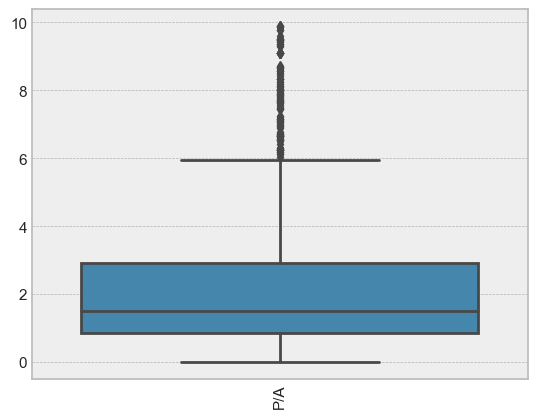

In [45]:
sns.boxplot(data=df_haryana_no_outlier[['P/A']])
plt.xticks(rotation=90)
plt.show()

> ### much better than the previous one

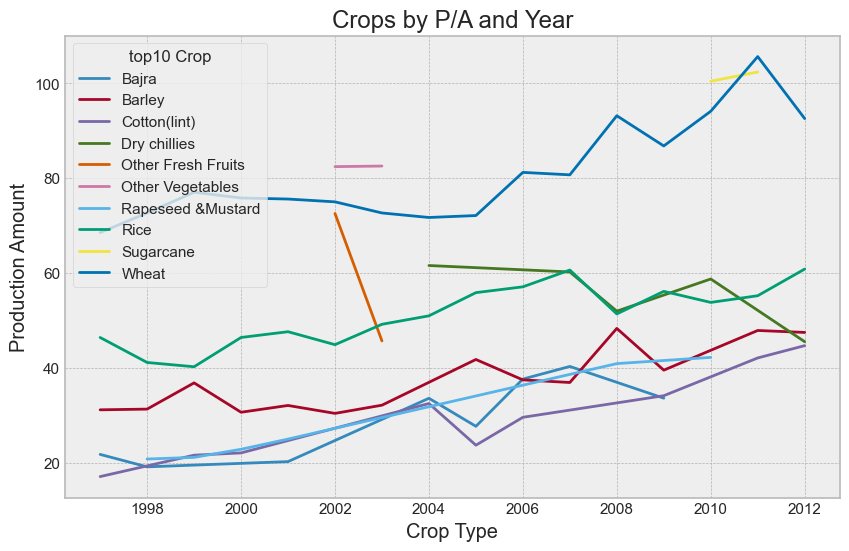

In [46]:
# Group the data by crop type and year and sum the production amounts
crop_production = df_haryana_no_outlier.groupby(['Crop', 'Crop_Year'])['P/A'].sum()

# Sort the data by production amount and select the top 5 crops for each year
top_5_crops = crop_production.groupby('Crop_Year').nlargest(5)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for year in top_5_crops.index.levels[1]:
    crop_data = top_5_crops.loc[:, year]
    ax.plot(crop_data.index.get_level_values(0), crop_data.values, label=year)
ax.set_title('Crops by P/A and Year')
ax.set_xlabel('Crop Type')
ax.set_ylabel('Production Amount')
ax.legend(title='top10 Crop')
plt.show()

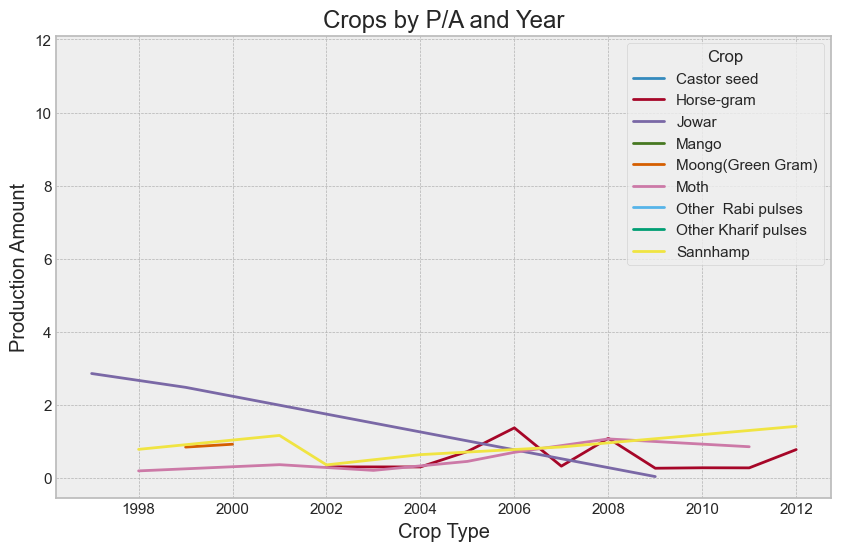

In [47]:
# Group the data by crop type and year and sum the production amounts
crop_production = df_haryana_no_outlier.groupby(['Crop', 'Crop_Year'])['P/A'].sum()

# Sort the data by production amount and select the top 5 crops for each year
top_5_crops = crop_production.groupby('Crop_Year').nsmallest(2)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for year in top_5_crops.index.levels[1]:
    crop_data = top_5_crops.loc[:, year]
    ax.plot(crop_data.index.get_level_values(0), crop_data.values, label=year)
ax.set_title('Crops by P/A and Year')
ax.set_xlabel('Crop Type')
ax.set_ylabel('Production Amount')
ax.legend(title='Crop')
plt.show()

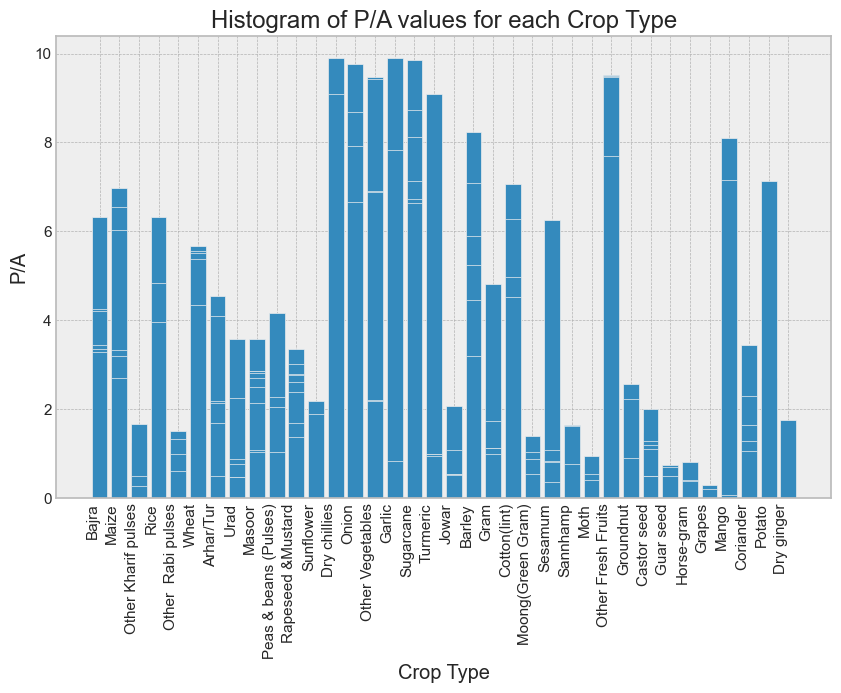

In [50]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(df_haryana_no_outlier['Crop'], df_haryana_no_outlier['P/A'])
plt.xlabel('Crop Type')
plt.ylabel('P/A')
plt.title('Histogram of P/A values for each Crop Type')
plt.xticks(rotation=90, ha='right') 
plt.show()

In [28]:
df_haryana_no_outlier['Crop'].value_counts()

Crop
Wheat                    317
Rice                     299
Bajra                    276
Rapeseed &Mustard        268
Arhar/Tur                213
Barley                   187
Cotton(lint)             175
Gram                     158
Masoor                   133
Jowar                    122
Dry chillies             117
Sesamum                  112
Moong(Green Gram)        105
Peas & beans (Pulses)     93
Groundnut                 91
Maize                     84
Urad                      72
Sunflower                 62
Moth                      42
Garlic                    32
Sugarcane                 29
Other Vegetables          28
Castor seed               25
Other Kharif pulses       23
Other Fresh Fruits        21
Horse-gram                18
Sannhamp                  17
Guar seed                 16
Other  Rabi pulses        13
Turmeric                  10
Coriander                 10
Mango                      9
Onion                      6
Potato                     3
Grapes   

> ### let consider only the num of each crop-type that consist greater than 50 rows

In [29]:
# Assuming df_no_outliers is your DataFrame
filter_crop_df = df_haryana_no_outlier[df_haryana_no_outlier['Crop'].map(df_haryana_no_outlier['Crop'].value_counts()) > 50]
print(len(filter_crop_df))
filter_crop_df.head(2)

2884


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,P/A
65596,Haryana,AMBALA,1997,Kharif,Bajra,1000.0,1000.0,1.000
65597,Haryana,AMBALA,1997,Kharif,Maize,8000.0,15000.0,1.875


In [30]:
filter_crop_df['Crop'].value_counts()

Crop
Wheat                    317
Rice                     299
Bajra                    276
Rapeseed &Mustard        268
Arhar/Tur                213
Barley                   187
Cotton(lint)             175
Gram                     158
Masoor                   133
Jowar                    122
Dry chillies             117
Sesamum                  112
Moong(Green Gram)        105
Peas & beans (Pulses)     93
Groundnut                 91
Maize                     84
Urad                      72
Sunflower                 62
Name: count, dtype: int64

In [31]:
filter_crop_df['Crop'].nunique()

18

In [32]:
filter_crop_df['District_Name'].nunique()

21

> ### Perfect, dea the chosen crop type is available all DistrictName in Haryana State

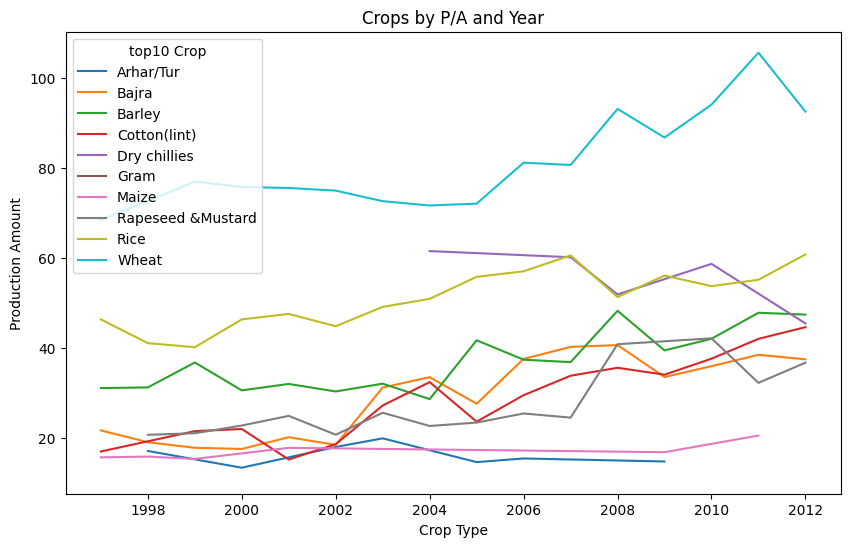

In [33]:
# Group the data by crop type and year and sum the production amounts
crop_production = filter_crop_df.groupby(['Crop', 'Crop_Year'])['P/A'].sum()

# Sort the data by production amount and select the top 5 crops for each year
top_5_crops = crop_production.groupby('Crop_Year').nlargest(7)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for year in top_5_crops.index.levels[1]:
    crop_data = top_5_crops.loc[:, year]
    ax.plot(crop_data.index.get_level_values(0), crop_data.values, label=year)
ax.set_title('Crops by P/A and Year')
ax.set_xlabel('Crop Type')
ax.set_ylabel('Production Amount')
ax.legend(title='top10 Crop')
plt.show()

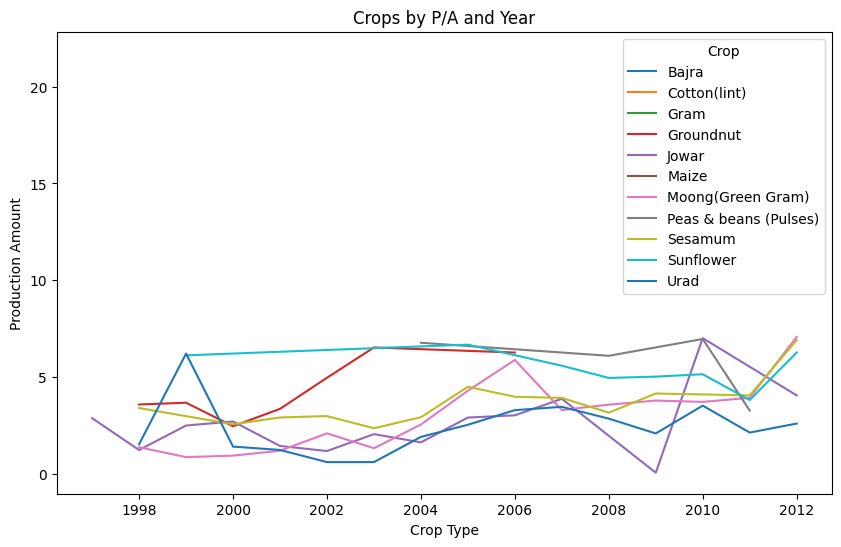

In [34]:
# Group the data by crop type and year and sum the production amounts
crop_production = filter_crop_df.groupby(['Crop', 'Crop_Year'])['P/A'].sum()

# Sort the data by production amount and select the top 5 crops for each year
top_5_crops = crop_production.groupby('Crop_Year').nsmallest(5)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for year in top_5_crops.index.levels[1]:
    crop_data = top_5_crops.loc[:, year]
    ax.plot(crop_data.index.get_level_values(0), crop_data.values, label=year)
ax.set_title('Crops by P/A and Year')
ax.set_xlabel('Crop Type')
ax.set_ylabel('Production Amount')
ax.legend(title='Crop')
plt.show()

In [35]:
# Convert columns to numeric in case they contain strings
numeric_columns = ['P/A' ]
filter_crop_df[numeric_columns] = filter_crop_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the mean values for each column based on 'blockname'
district = filter_crop_df.groupby('District_Name')[numeric_columns].mean()


district_PnA = pd.DataFrame(district)
district_PnA

C:\Users\User\AppData\Local\Temp\ipykernel_4004\4022165507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_crop_df[numeric_columns] = filter_crop_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


,P/A
District_Name,
AMBALA,2.127987
BHIWANI,1.519711
FARIDABAD,1.776777
FATEHABAD,2.344767
GURGAON,1.628803
HISAR,1.857163
JHAJJAR,1.707002
JIND,2.198801
KAITHAL,2.349252


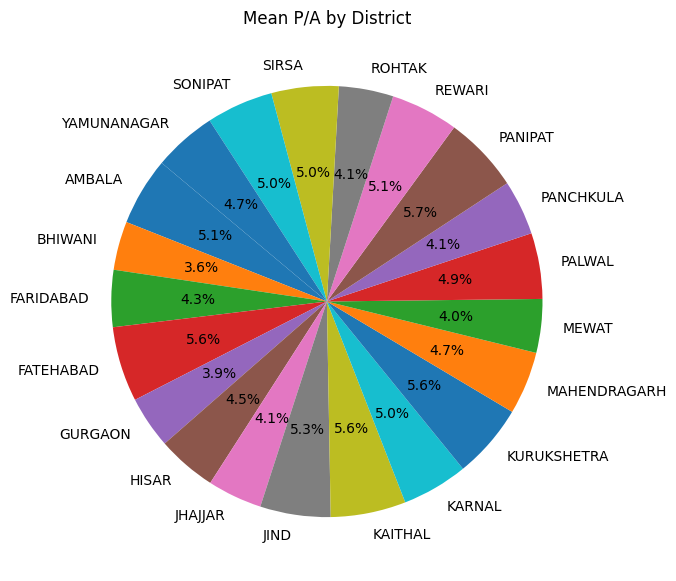

In [36]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(district['P/A'], labels=district.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean P/A by District')
plt.show()

In [37]:
# Convert columns to numeric in case they contain strings
numeric_columns = ['P/A' ]
filter_crop_df[numeric_columns] = filter_crop_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the mean values for each column based on 'blockname'
crop = filter_crop_df.groupby('Crop')[numeric_columns].mean()


crop_PnA = pd.DataFrame(crop)
crop_PnA

C:\Users\User\AppData\Local\Temp\ipykernel_4004\3490109933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_crop_df[numeric_columns] = filter_crop_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


,P/A
Crop,
Arhar/Tur,1.107775
Bajra,1.710737
Barley,3.180777
Cotton(lint),2.572523
Dry chillies,3.213744
Gram,1.065216
Groundnut,0.997831
Jowar,0.400912
Maize,2.845817


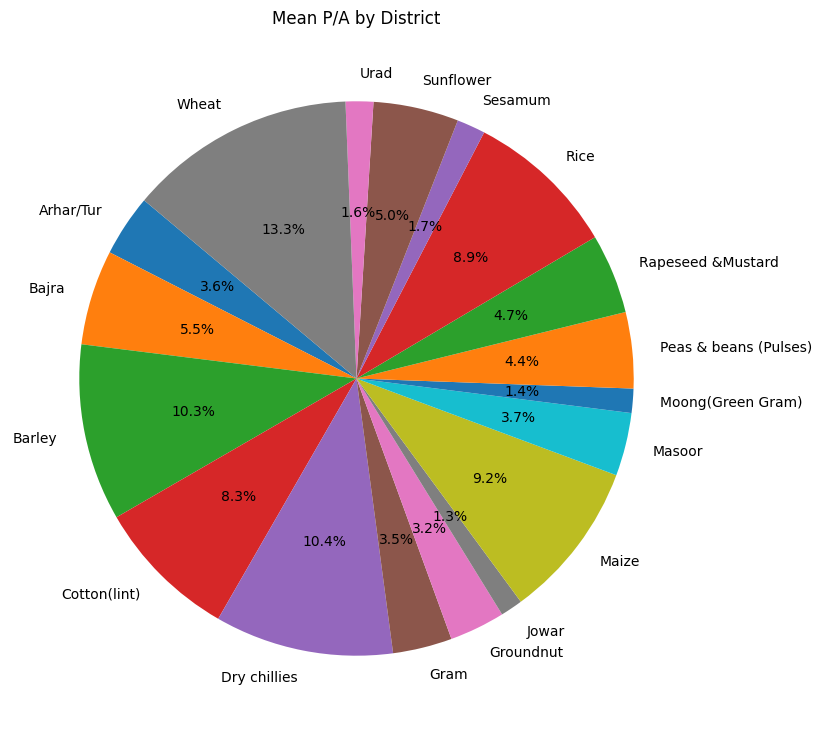

In [38]:
# Plotting the pie chart
plt.figure(figsize=(9, 9))
plt.pie(crop['P/A'], labels=crop.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean P/A by District')
plt.show()

In [39]:
# filter_crop_df.to_csv('18Crop_Haryana.csv')

## **`Draw a Conclusion`**

### For apy.csv only, our approach to define and get the good dataset in 21 DistrictName of Haryana State.
> ### 1ststep - work only in State Haryana which consists 21 DistrictName

> ### 2ndstep - derive the MissingValue & ZeroValue of Production- drop vea jol all, then we get `3190` dataset
- Obv, we don need to think bout the ZeroValue of Production, even though it does importance of soil-nutrient forecasting.
- reasoning why we don care, tho?? Since, it is important to consider. The reason is bcuz we wanna make a model that based on the avg of each soil-properity, that model gonna make a prediction of the avg Production amount of any specific crop-type.

> ### 3rdstep - define outlier
- add one more column name which is `P/A` (the range num of P/A is good is when the comparision btw Production(ton)/Area(hectare) is less than 10 mostly)
- so, in case that value of P/A increase to more than 10, we can say that it not quite good

> ### 4thstep - continue from the 3rdstep to see how many/what DistrictName consist
- we still get 21 DistrictName

> ### 

> ###

> ###

> ### 